In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## EDA

The dataset has 1174 rows and 59 columns.
Food Name                                object
Category Name                            object
Calcium                                 float64
Calories                                float64
Carbs                                   float64
Cholesterol                             float64
Copper                                  float64
Fats                                    float64
Fiber                                   float64
Folate                                  float64
Iron                                    float64
Magnesium                               float64
Monounsaturated Fat                     float64
Net carbs                               float64
Omega-3 - DHA                           float64
Omega-3 - DPA                           float64
Omega-3 - EPA                           float64
Phosphorus                              float64
Polyunsaturated fat                     float64
Potassium                               float6

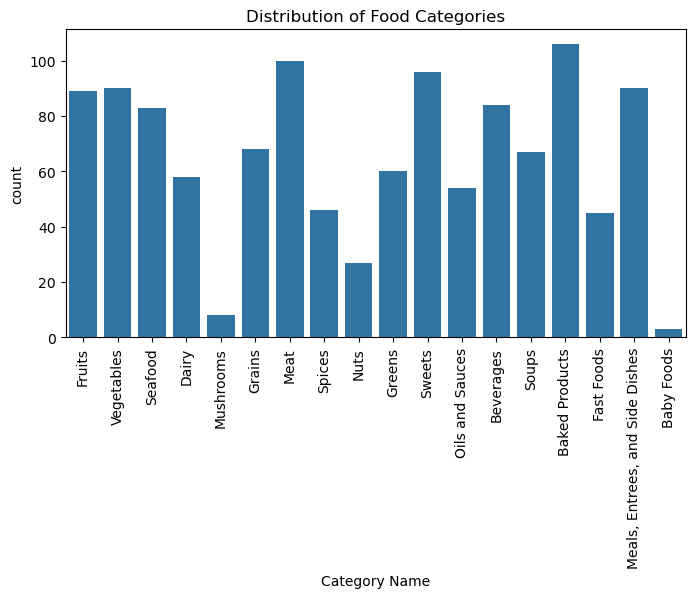

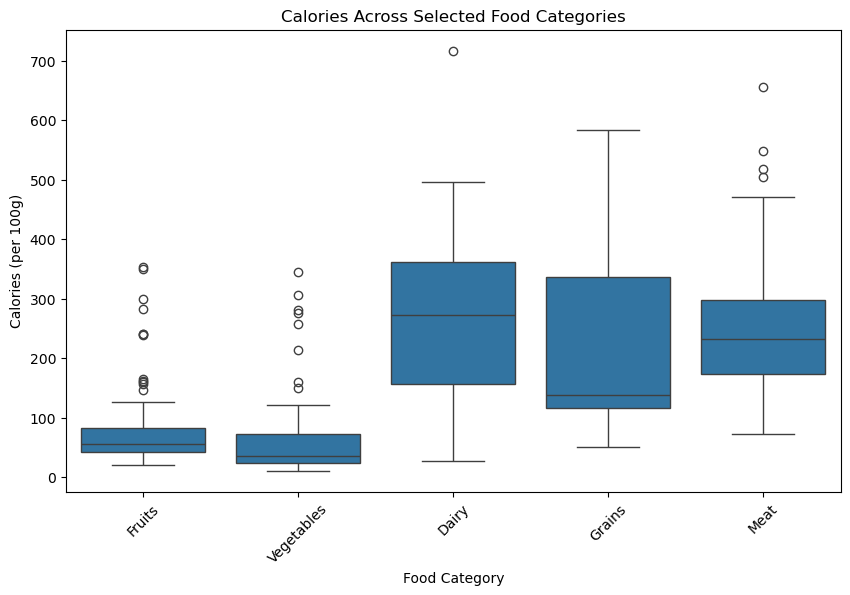

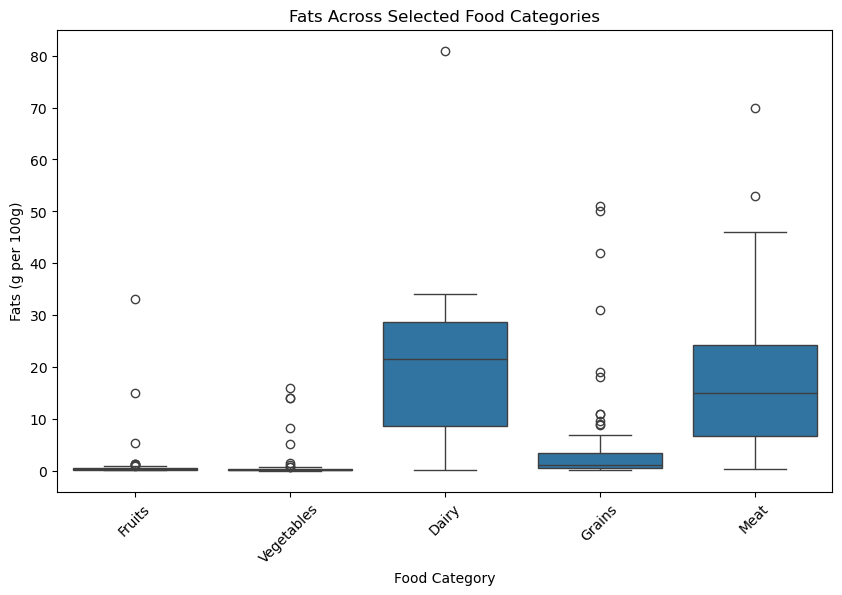

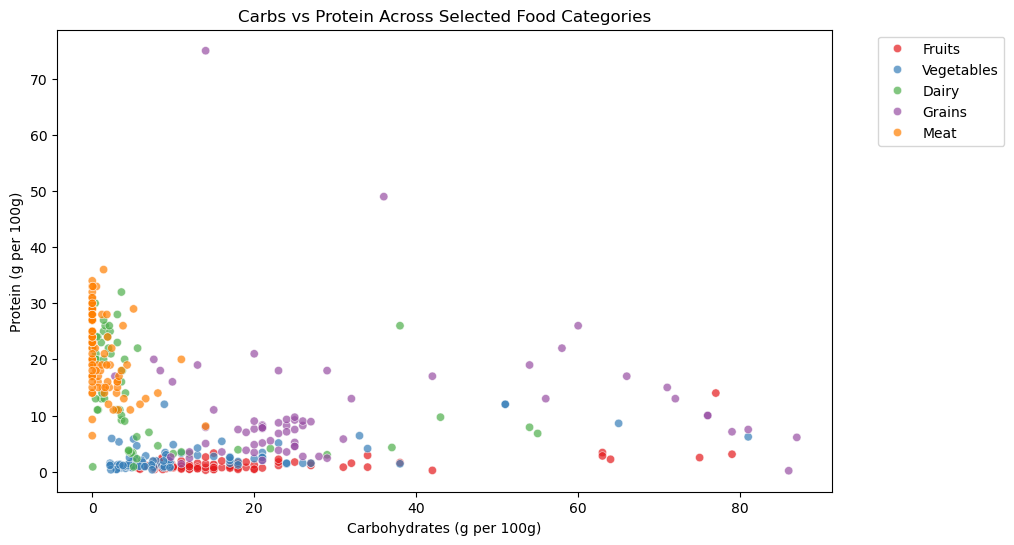

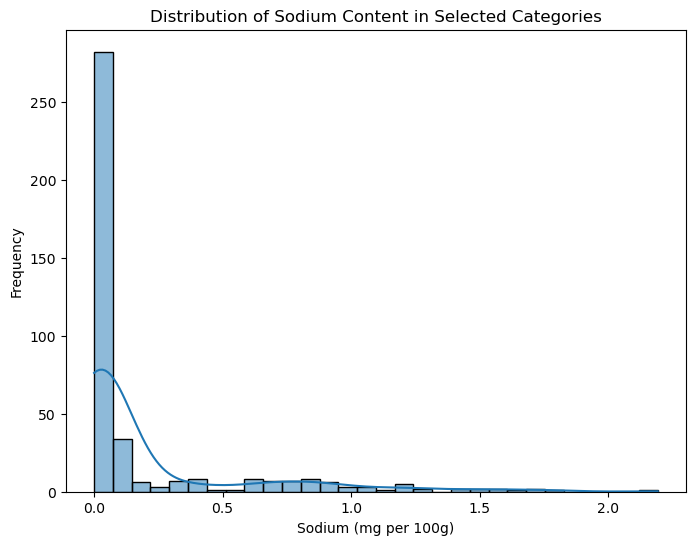

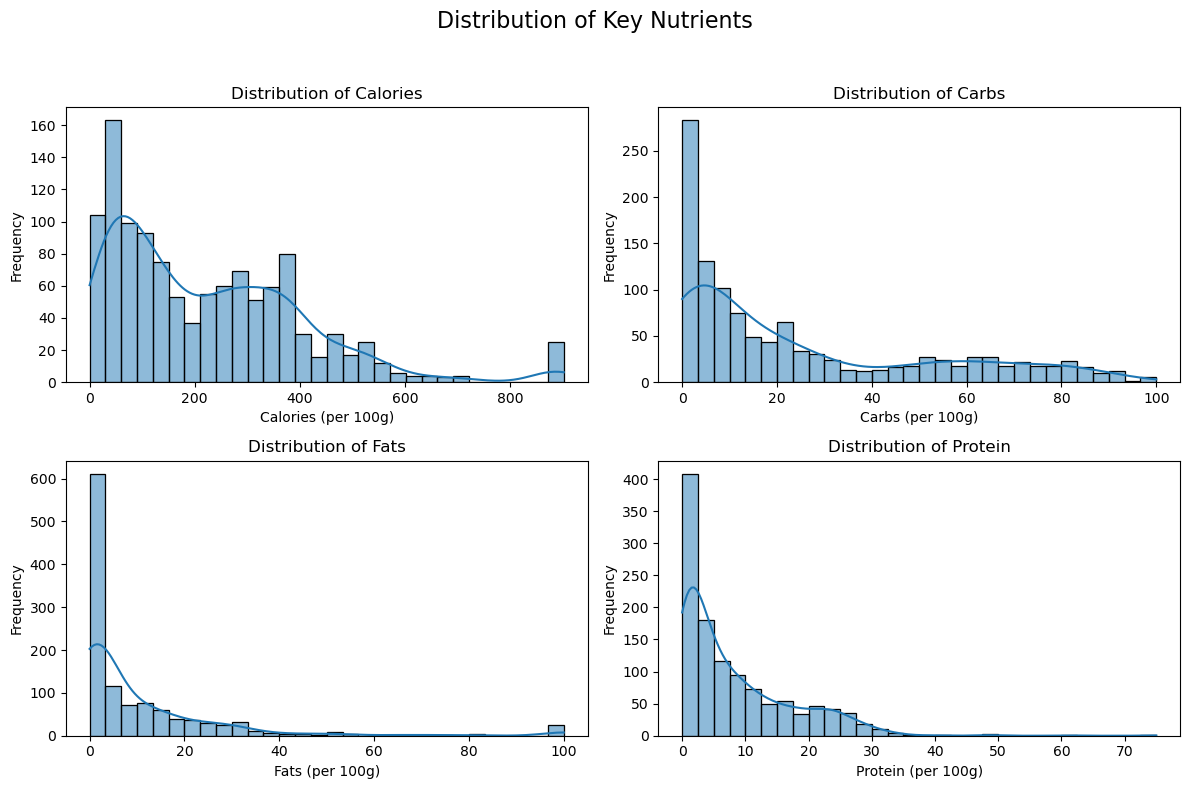


Top 10 categories by average Protein content:
                                    Protein
Category Name                             
Seafood                          21.707229
Meat                             21.548000
Dairy                            14.201724
Nuts                             12.996296
Grains                           10.695000
Fast Foods                       10.574444
Spices                           10.102391
Meals, Entrees, and Side Dishes   8.339778
Baked Products                    7.524528
Baby Foods                        7.400000


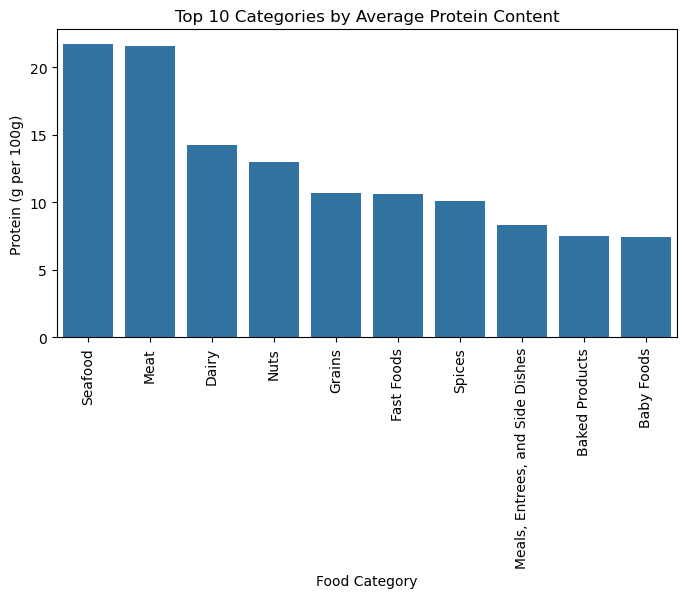

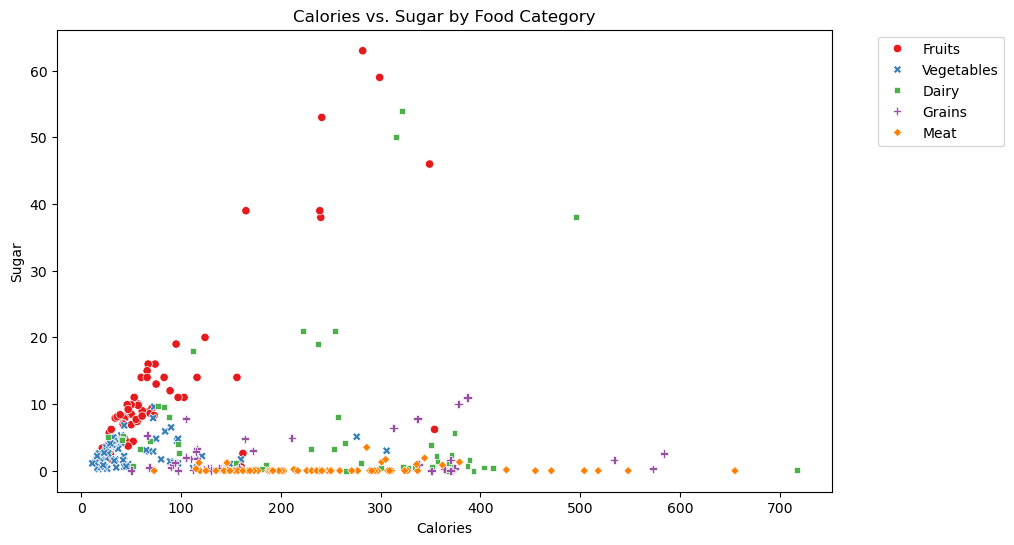

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('midterm/foodstruct_nutritional_facts.csv')

# 1. Data Overview
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")
pd.set_option('display.max_rows', None)
print(data.dtypes)

# 2. Check Missing Values
print("\nMissing values per column:")
print(data.isnull().sum())

# 3. Summary of Target Variable (Food Category)
print(data['Category Name'].value_counts())
print(data['Category Name'].describe())

# Visualize distribution of the target variable (Category Name)
plt.figure(figsize=(8, 4))
sns.countplot(x='Category Name', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Food Categories')
plt.show()

# 4. Filter the dataset to focus on specific food categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]


# Boxplot: Calories across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Calories', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Calories Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Calories (per 100g)')
plt.show()

# Boxplot: Fats across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Fats', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Fats Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Fats (g per 100g)')
plt.show()

# Scatterplot: Carbs vs Protein for selected categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Carbs', y='Protein', hue='Category Name', data=filtered_data, palette='Set1', alpha=0.7)
plt.title('Carbs vs Protein Across Selected Food Categories')
plt.xlabel('Carbohydrates (g per 100g)')
plt.ylabel('Protein (g per 100g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Histogram: Sodium content distribution in selected categories
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Sodium'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sodium Content in Selected Categories')
plt.xlabel('Sodium (mg per 100g)')
plt.ylabel('Frequency')
plt.show()



# Distribution of Key Nutrients
# Plot histograms for key nutrients
key_nutrients = ['Calories', 'Carbs', 'Fats', 'Protein']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
fig.suptitle('Distribution of Key Nutrients', fontsize=16)

axes = axes.flatten()

for i, nutrient in enumerate(key_nutrients):
    sns.histplot(data[nutrient].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {nutrient}')
    axes[i].set_xlabel(f'{nutrient} (per 100g)')
    axes[i].set_ylabel('Frequency')


plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

# Top Categories by Nutrient
top_protein_categories = data[['Category Name', 'Protein']].groupby('Category Name').mean().sort_values(by='Protein', ascending=False).head(10)
print("\nTop 10 categories by average Protein content:\n", top_protein_categories)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_protein_categories.index, y=top_protein_categories['Protein'])
plt.xticks(rotation=90)
plt.title('Top 10 Categories by Average Protein Content')
plt.xlabel('Food Category')
plt.ylabel('Protein (g per 100g)')
plt.show()

# calories vs. sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Calories', y='Sugar', hue='Category Name', style='Category Name', palette='Set1')
plt.title('Calories vs. Sugar by Food Category')
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




## Preprocessing

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('midterm/foodstruct_nutritional_facts.csv')

# 1. Split the data
X = data.drop(columns=['Category Name'])  # Features
y = data['Category Name']  # Target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train set size: {X_train.shape[0]} data points, Test set size: {X_test.shape[0]} data points.")
print(f"Number of features: {X_train.shape[1]} before preprocessing")

# 2. Missing values analysis before preprocessing
missing_values_before = X_train.isnull().sum()
fraction_missing_values = X_train.isnull().mean()


print("\nMissing values in features before preprocessing:")
print(missing_values_before[missing_values_before > 0])


print("\nFraction of missing values per feature:")
print(fraction_missing_values[fraction_missing_values > 0])

# 3. Preprocessing
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns


imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric_imputed = pd.DataFrame(imputer.transform(X_test[numeric_cols]), columns=numeric_cols)


X_train_non_numeric = X_train[non_numeric_cols].copy()
X_test_non_numeric = X_test[non_numeric_cols].copy()

# Scaling the numeric data
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric_imputed), columns=numeric_cols)
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric_imputed), columns=numeric_cols)

# Combine scaled numeric and non-numeric columns back together
X_train_final = pd.concat([X_train_numeric_scaled, X_train_non_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_numeric_scaled, X_test_non_numeric.reset_index(drop=True)], axis=1)

# 4. After Preprocessing
print("\nNumber of features after preprocessing:", X_train_final.shape[1])

# Check for any remaining missing values after imputation
missing_values_after = X_train_final.isnull().sum()
print("\nMissing values in features after preprocessing (should be zero for numeric features):\n", missing_values_after[missing_values_after > 0])


Train set size: 939 data points, Test set size: 235 data points.
Number of features: 58 before preprocessing

Missing values in features before preprocessing:
Calcium                                  19
Cholesterol                              40
Copper                                   64
Fiber                                    76
Folate                                   79
Iron                                     16
Magnesium                                48
Monounsaturated Fat                      85
Net carbs                                 1
Omega-3 - DHA                           214
Omega-3 - DPA                           219
Omega-3 - EPA                           213
Phosphorus                               37
Polyunsaturated fat                      85
Potassium                                36
Saturated Fat                            62
Selenium                                120
Sodium                                   16
Trans Fat                               436
Vitam

Validation Accuracy: 0.9506172839506173
Validation Classification Report:
              precision    recall  f1-score   support

       Dairy       1.00      0.91      0.95        11
      Fruits       0.94      0.94      0.94        18
      Grains       0.93      1.00      0.97        14
        Meat       1.00      1.00      1.00        20
  Vegetables       0.89      0.89      0.89        18

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Test Accuracy: 0.9382716049382716
Test Classification Report:
              precision    recall  f1-score   support

       Dairy       1.00      1.00      1.00        12
      Fruits       0.86      1.00      0.92        18
      Grains       0.85      0.85      0.85        13
        Meat       1.00      1.00      1.00        20
  Vegetables       1.00      0.83      0.91        18

    accuracy                           0.94      

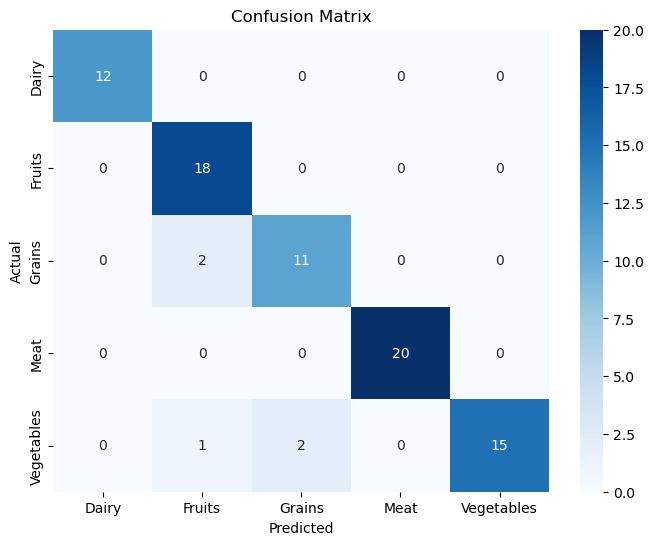

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv('../data1030_midterm/foodstruct_nutritional_facts.csv')


categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]


X = filtered_data.drop(columns=['Food Name', 'Category Name'])
y = filtered_data['Category Name']


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)


numeric_cols = X.select_dtypes(include=[np.number]).columns


fully_missing_cols = [col for col in numeric_cols if X_train[col].isnull().all()]
numeric_cols = numeric_cols.difference(fully_missing_cols)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), 
                               columns=numeric_cols, index=X_train.index)
X_val_imputed = pd.DataFrame(imputer.transform(X_val[numeric_cols]), 
                             columns=numeric_cols, index=X_val.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test[numeric_cols]), 
                              columns=numeric_cols, index=X_test.index)


for col in fully_missing_cols:
    X_train_imputed[col] = 0
    X_val_imputed[col] = 0
    X_test_imputed[col] = 0


X_train_imputed = X_train_imputed[X.select_dtypes(include=[np.number]).columns]
X_val_imputed = X_val_imputed[X.select_dtypes(include=[np.number]).columns]
X_test_imputed = X_test_imputed[X.select_dtypes(include=[np.number]).columns]


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), 
                              columns=X_train_imputed.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), 
                            columns=X_val_imputed.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), 
                             columns=X_test_imputed.columns, index=X_test.index)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)


y_val_pred = rf_clf.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = rf_clf.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# logistic regression as baseline, xgboost, 4 total models 
# for each model, experiment with hyperparameters, and find best one 
# do that in grid search cv, 
# create table and put model name, hyperparemeters for each model
# line of accuacies 
# when use xgboost model, impute missing continous variables, for other models use reduced features method
# precision and recall curve 
# baseline in addition to the 4 models 
# baseline score is proportion of true class in dataset - logistic regression
# 3 different hyperparamters for each model 


Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training KNN...

Baseline Accuracy: 0.2469

Model Performance:
Logistic Regression:
  Best Parameters: {'C': 10}
  Validation Accuracy: 0.7407
  Test Accuracy: 0.8148
Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 50}
  Validation Accuracy: 0.7901
  Test Accuracy: 0.8395
XGBoost:
  Best Parameters: {'learning_rate': 0.1}
  Validation Accuracy: 0.8765
  Test Accuracy: 0.9259
KNN:
  Best Parameters: {'n_neighbors': 5}
  Validation Accuracy: 0.6420
  Test Accuracy: 0.8148


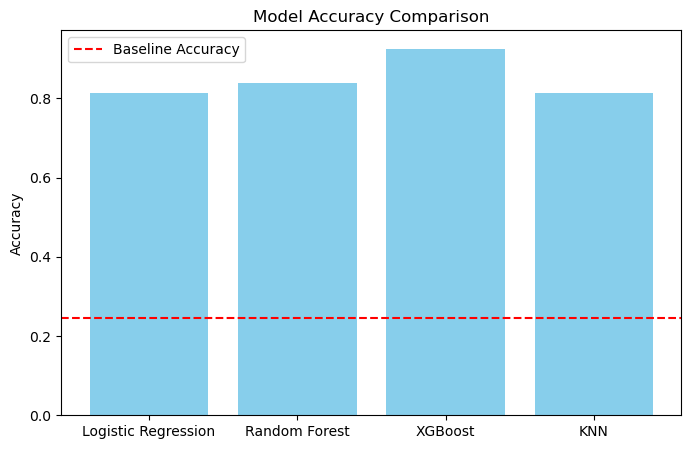


Confusion Matrix for Logistic Regression:


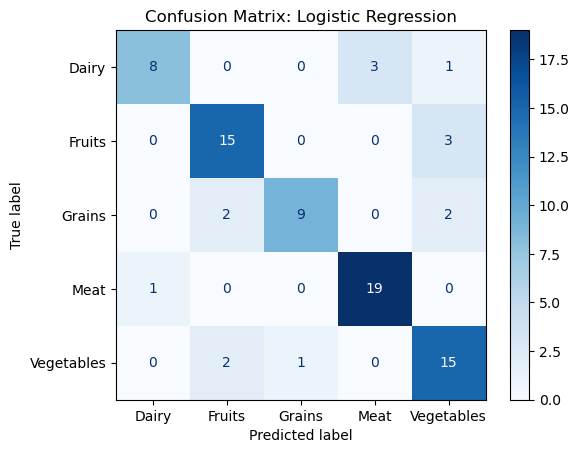


Confusion Matrix for Random Forest:


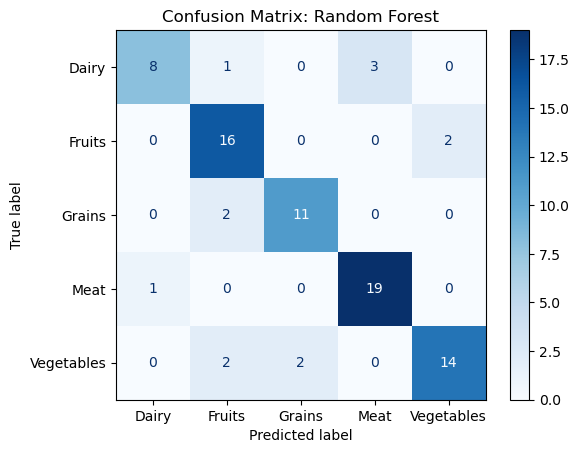


Confusion Matrix for XGBoost:


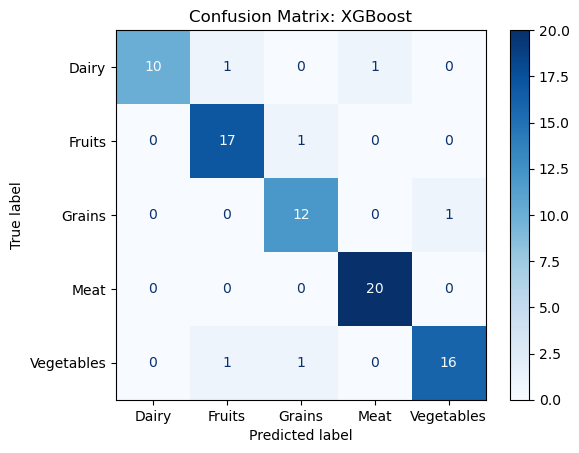


Confusion Matrix for KNN:


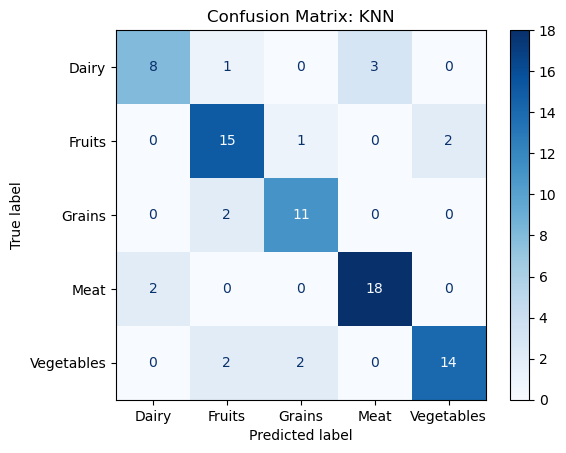

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clarity

# Load the dataset
data = pd.read_csv('../data1030_midterm/foodstruct_nutritional_facts.csv')

# Focus on specific food categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]

# Separate features and target
X = filtered_data.drop(columns=['Category Name', 'Food Name'])  # Features
y = filtered_data['Category Name']  # Target

# Encode the target variable into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(
    X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42
)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(
    X_temp, y_temp_encoded, test_size=0.5, stratify=y_temp_encoded, random_state=42
)

# Select numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns


cols_all_nan = X_train[numeric_cols].columns[
    X_train[numeric_cols].isna().all()
].tolist()


numeric_cols = numeric_cols.drop(cols_all_nan)
X_train_numeric = X_train[numeric_cols]
X_val_numeric = X_val[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Reduced features method for Logistic Regression, Random Forest, and KNN
# Drop columns with missing values from the training set
cols_with_nan_train = X_train_numeric.columns[
    X_train_numeric.isna().any()
].tolist()

X_train_reduced = X_train_numeric.drop(columns=cols_with_nan_train)
common_columns = X_train_reduced.columns

# Impute missing values in validation and test sets for these columns
# Use the mean of the training set for imputation
imputer_reduced = SimpleImputer(strategy='mean')
imputer_reduced.fit(X_train_reduced)

X_val_reduced = X_val_numeric[common_columns]
X_test_reduced = X_test_numeric[common_columns]

X_val_reduced = pd.DataFrame(
    imputer_reduced.transform(X_val_reduced),
    columns=common_columns,
    index=X_val.index
)
X_test_reduced = pd.DataFrame(
    imputer_reduced.transform(X_test_reduced),
    columns=common_columns,
    index=X_test.index
)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_val_scaled = scaler.transform(X_val_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# For XGBoost: Impute missing values in all datasets
imputer_full = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(
    imputer_full.fit_transform(X_train_numeric),
    columns=X_train_numeric.columns,
    index=X_train.index
)
X_val_imputed = pd.DataFrame(
    imputer_full.transform(X_val_numeric),
    columns=X_val_numeric.columns,
    index=X_val.index
)
X_test_imputed = pd.DataFrame(
    imputer_full.transform(X_test_numeric),
    columns=X_test_numeric.columns,
    index=X_test.index
)

# Scale features for XGBoost 
scaler_full = StandardScaler()
X_train_imputed_scaled = scaler_full.fit_transform(X_train_imputed)
X_val_imputed_scaled = scaler_full.transform(X_val_imputed)
X_test_imputed_scaled = scaler_full.transform(X_test_imputed)

# Models and Hyperparameters
models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'C': [0.1, 1, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    ),
    'XGBoost': (
        XGBClassifier(eval_metric='mlogloss', random_state=42),  
        {'learning_rate': [0.01, 0.1, 0.2]}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7]}
    )
}

# Grid Search and Evaluation
results = {}
for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'XGBoost':
        grid_search = GridSearchCV(
            model, params, cv=5, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train_imputed_scaled, y_train_encoded)
        best_model = grid_search.best_estimator_
        y_val_pred_encoded = best_model.predict(X_val_imputed_scaled)
        y_test_pred_encoded = best_model.predict(X_test_imputed_scaled)
    else:
        grid_search = GridSearchCV(
            model, params, cv=5, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train_encoded)
        best_model = grid_search.best_estimator_
        y_val_pred_encoded = best_model.predict(X_val_scaled)
        y_test_pred_encoded = best_model.predict(X_test_scaled)
    
    # Decode the predicted labels back to original categories
    y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)
    y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
    y_val_true = label_encoder.inverse_transform(y_val_encoded)
    y_test_true = label_encoder.inverse_transform(y_test_encoded)
    
    results[name] = {
        'best_params': grid_search.best_params_,
        'validation_accuracy': accuracy_score(y_val_true, y_val_pred),
        'test_accuracy': accuracy_score(y_test_true, y_test_pred),
        'classification_report_val': classification_report(
            y_val_true, y_val_pred, output_dict=True
        ),
        'classification_report_test': classification_report(
            y_test_true, y_test_pred, output_dict=True
        ),
        'best_model': best_model
    }

# Baseline
baseline_accuracy = np.max(np.bincount(y_test_encoded)) / len(y_test_encoded)
print(f"\nBaseline Accuracy: {baseline_accuracy:.4f}")

# Results Summary
print("\nModel Performance:")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Best Parameters: {res['best_params']}")
    print(f"  Validation Accuracy: {res['validation_accuracy']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
plt.bar(model_names, accuracies, color='skyblue')
plt.axhline(
    y=baseline_accuracy, color='r', linestyle='--', label='Baseline Accuracy'
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Confusion Matrices for Each Model
for name, res in results.items():
    print(f"\nConfusion Matrix for {name}:")
    y_test_true = label_encoder.inverse_transform(y_test_encoded)
    y_pred = res['best_model'].predict(X_test_scaled if name != 'XGBoost' else X_test_imputed_scaled)
    y_pred = label_encoder.inverse_transform(y_pred)
    
    cm = confusion_matrix(y_test_true, y_pred, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_
    )
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()



Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training KNN...

Baseline Accuracy: 0.2469

Model Performance:
Logistic Regression:
  Best Parameters: {'C': 10}
  Validation Accuracy: 0.7407
  Test Accuracy: 0.8148
Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 50}
  Validation Accuracy: 0.7901
  Test Accuracy: 0.8395
XGBoost:
  Best Parameters: {'learning_rate': 0.2}
  Validation Accuracy: 0.9012
  Test Accuracy: 0.9259
KNN:
  Best Parameters: {'n_neighbors': 5}
  Validation Accuracy: 0.6420
  Test Accuracy: 0.8148


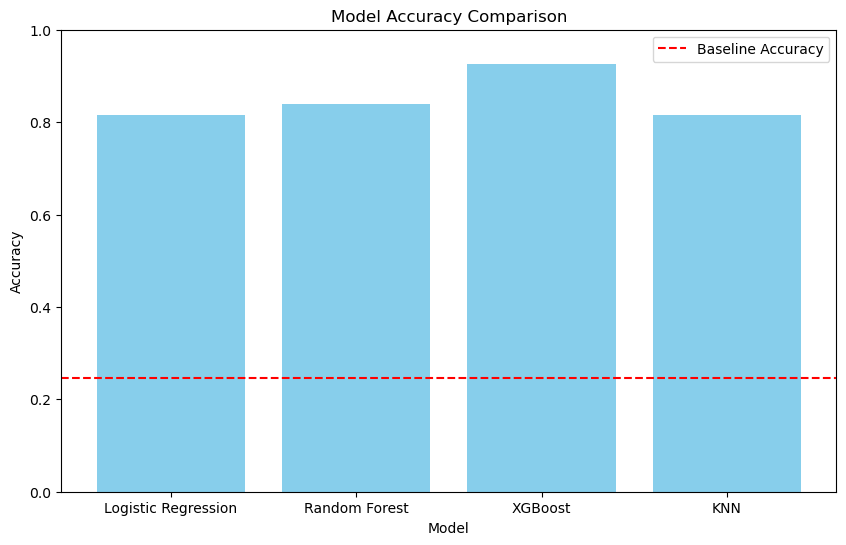


Confusion Matrix for Logistic Regression:


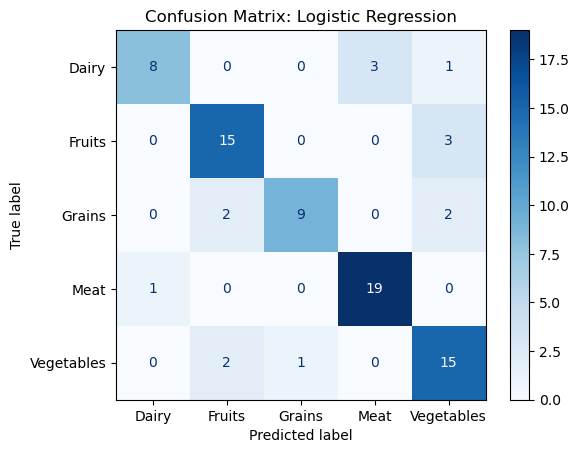


Confusion Matrix for Random Forest:


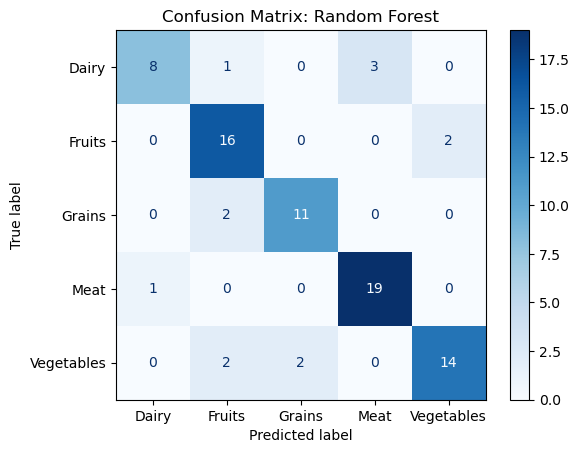


Confusion Matrix for XGBoost:


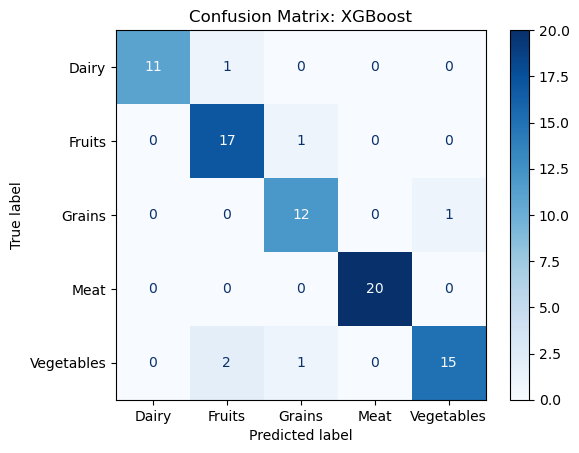


Confusion Matrix for KNN:


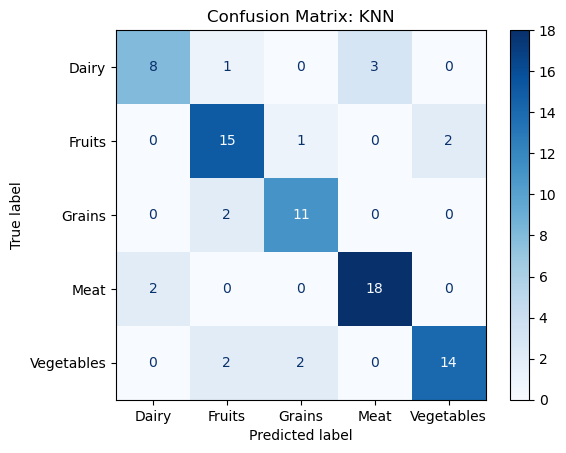

In [22]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

# Suppress Warnings for Clarity
warnings.filterwarnings('ignore')

# Load the Dataset
data = pd.read_csv('../data1030_midterm/foodstruct_nutritional_facts.csv')

# Focus on Specific Food Categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]

# Separate Features and Target
X = filtered_data.drop(columns=['Category Name', 'Food Name'])  # Features
y = filtered_data['Category Name']  # Target

# Encode the Target Variable into Numeric Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the Data into Training, Validation, and Test Sets
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(
    X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42
)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(
    X_temp, y_temp_encoded, test_size=0.5, stratify=y_temp_encoded, random_state=42
)

# Identify Numeric Columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# ---------------------
# Pipeline for XGBoost
# ---------------------

# Identify Columns with All NaN Values in the Training Set and Drop Them
cols_all_nan = X_train[numeric_cols].columns[X_train[numeric_cols].isna().all()].tolist()

# Update Numeric Columns by Dropping Columns with All NaNs
numeric_cols_xgb = numeric_cols.drop(cols_all_nan)

# Extract Numeric Features for XGBoost
X_train_xgb = X_train[numeric_cols_xgb]
X_val_xgb = X_val[numeric_cols_xgb]
X_test_xgb = X_test[numeric_cols_xgb]


scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_val_xgb_scaled = scaler_xgb.transform(X_val_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

# ------------------------------
# Pipeline for Other Models (LR, RF, KNN)
# ------------------------------

# Identify Columns with Any NaN Values in the Training Set and Drop Them
cols_with_nan_train = X_train[numeric_cols].columns[X_train[numeric_cols].isna().any()].tolist()

# Drop Columns with Any NaN Values from Training, Validation, and Test Sets
X_train_reduced = X_train[numeric_cols].drop(columns=cols_with_nan_train)
X_val_reduced = X_val[numeric_cols].drop(columns=cols_with_nan_train)
X_test_reduced = X_test[numeric_cols].drop(columns=cols_with_nan_train)

# Impute Missing Values in Reduced Sets Using Mean Strategy
imputer_reduced = SimpleImputer(strategy='mean')
imputer_reduced.fit(X_train_reduced)  # Fit only on training data

X_train_imputed = pd.DataFrame(
    imputer_reduced.transform(X_train_reduced),
    columns=X_train_reduced.columns,
    index=X_train_reduced.index
)
X_val_imputed = pd.DataFrame(
    imputer_reduced.transform(X_val_reduced),
    columns=X_val_reduced.columns,
    index=X_val_reduced.index
)
X_test_imputed = pd.DataFrame(
    imputer_reduced.transform(X_test_reduced),
    columns=X_test_reduced.columns,
    index=X_test_reduced.index
)

# Feature Scaling for Other Models
scaler_other = StandardScaler()
X_train_scaled = scaler_other.fit_transform(X_train_imputed)
X_val_scaled = scaler_other.transform(X_val_imputed)
X_test_scaled = scaler_other.transform(X_test_imputed)

# ---------------------
# Define Models and Hyperparameters
# ---------------------

models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'C': [0.1, 1, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    ),
    'XGBoost': (
        XGBClassifier(eval_metric='mlogloss', random_state=42),  # Removed 'use_label_encoder'
        {'learning_rate': [0.01, 0.1, 0.2]}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7]}
    )
}

# ---------------------
# Grid Search and Model Evaluation
# ---------------------

results = {}

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'XGBoost':
        # XGBoost can handle missing values internally; use the XGBoost pipeline
        grid_search = GridSearchCV(
            model, params, cv=5, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train_xgb_scaled, y_train_encoded)
        best_model = grid_search.best_estimator_
        
        # Predictions
        y_val_pred_encoded = best_model.predict(X_val_xgb_scaled)
        y_test_pred_encoded = best_model.predict(X_test_xgb_scaled)
        
    else:
        # Other models require imputed and scaled data
        grid_search = GridSearchCV(
            model, params, cv=5, scoring='accuracy', n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train_encoded)
        best_model = grid_search.best_estimator_
        
        # Predictions
        y_val_pred_encoded = best_model.predict(X_val_scaled)
        y_test_pred_encoded = best_model.predict(X_test_scaled)
    
    # Decode Predicted Labels to Original Categories
    y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)
    y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
    y_val_true = label_encoder.inverse_transform(y_val_encoded)
    y_test_true = label_encoder.inverse_transform(y_test_encoded)
    
    # Store Results
    results[name] = {
        'best_params': grid_search.best_params_,
        'validation_accuracy': accuracy_score(y_val_true, y_val_pred),
        'test_accuracy': accuracy_score(y_test_true, y_test_pred),
        'classification_report_val': classification_report(
            y_val_true, y_val_pred, output_dict=True
        ),
        'classification_report_test': classification_report(
            y_test_true, y_test_pred, output_dict=True
        ),
        'best_model': best_model
    }

# ---------------------
# Baseline Model
# ---------------------

# Calculate Baseline Accuracy as the Proportion of the Most Frequent Class
baseline_accuracy = np.max(np.bincount(y_test_encoded)) / len(y_test_encoded)
print(f"\nBaseline Accuracy: {baseline_accuracy:.4f}")

# ---------------------
# Display Model Performance
# ---------------------

print("\nModel Performance:")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Best Parameters: {res['best_params']}")
    print(f"  Validation Accuracy: {res['validation_accuracy']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")

# ---------------------
# Plot Accuracy Comparison
# ---------------------

plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
plt.bar(model_names, accuracies, color='skyblue')
plt.axhline(
    y=baseline_accuracy, color='r', linestyle='--', label='Baseline Accuracy'
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend()
plt.show()

# ---------------------
# Plot Confusion Matrices for Each Model
# ---------------------

for name, res in results.items():
    print(f"\nConfusion Matrix for {name}:")
    if name == 'XGBoost':
        y_pred = res['best_model'].predict(X_test_xgb_scaled)
    else:
        y_pred = res['best_model'].predict(X_test_scaled)
    
    y_pred = label_encoder.inverse_transform(y_pred)
    y_test_true = label_encoder.inverse_transform(y_test_encoded)
    
    cm = confusion_matrix(y_test_true, y_pred, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_
    )
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


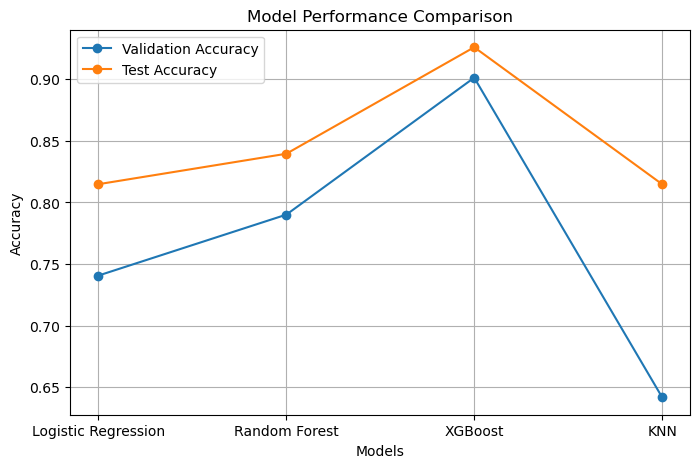

In [23]:
# Plot Code
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNN']
val_acc = [0.7407, 0.7901, 0.9012, 0.6420]
test_acc = [0.8148, 0.8395, 0.9259, 0.8148]

plt.figure(figsize=(8, 5))
plt.plot(models, val_acc, label='Validation Accuracy', marker='o')
plt.plot(models, test_acc, label='Test Accuracy', marker='o')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend()
plt.grid()
plt.show()


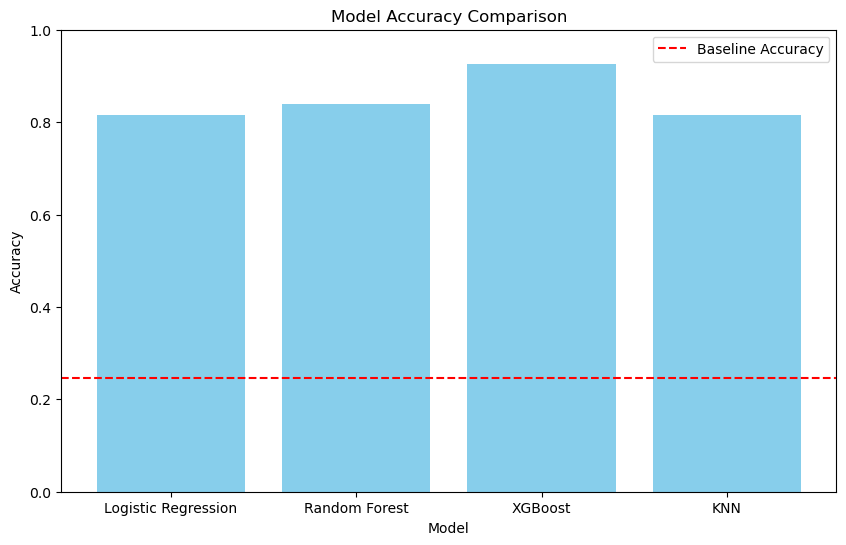

In [24]:
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
plt.bar(model_names, accuracies, color='skyblue')
plt.axhline(
    y=baseline_accuracy, color='r', linestyle='--', label='Baseline Accuracy'
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend()
plt.show()

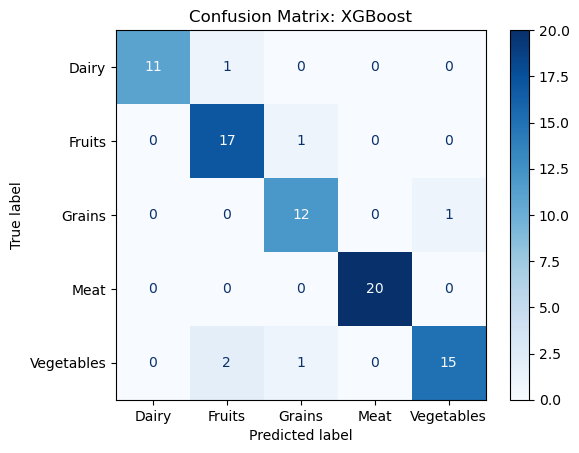

In [31]:
for name, res in results.items():
    if name == 'XGBoost':
        y_pred = res['best_model'].predict(X_test_xgb_scaled)
    
        y_pred = label_encoder.inverse_transform(y_pred)
        y_test_true = label_encoder.inverse_transform(y_test_encoded)
        
        cm = confusion_matrix(y_test_true, y_pred, labels=label_encoder.classes_)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=label_encoder.classes_
        )
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f"Confusion Matrix: {name}")
        plt.show()


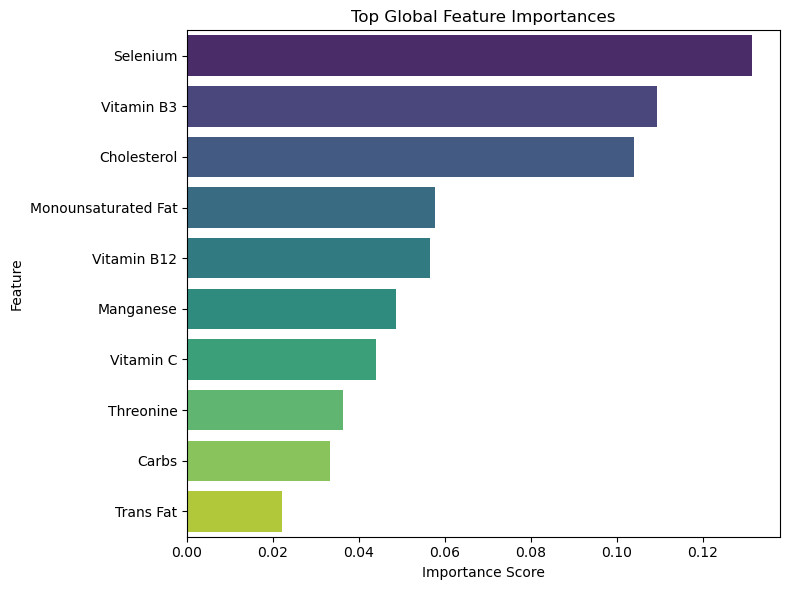

In [33]:
importances = best_xgboost.feature_importances_  # or best_random_forest.feature_importances_
feature_names = numeric_cols_xgb  # or numeric_cols_reduced for RF
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top Global Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
